# Gridworld AB

In this notebook we use our `GridWorld` class to implement Example 3.5 and Example 3.8 from
[Sutton & Barto](http://incompleteideas.net/book/RLbook2020trimmed.pdf#%5B%7B%22num%22%3A937%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C21.6%2C321.89%2Cnull%5D)
(p. 60, p.65).


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from gridworld import GridWorld 

# Use `tk` for interactive play, `inline` for normal plots:
# %matplotlib tk
%matplotlib inline

Instantiate a 5 by 5 gridworld. Then:
- Label positions $(4,1)$ and $(2,3)$ as states $A$ and $B$, respectively.
- Add "portals" from $(0,1)$ to $A$ and from $(0,3)$ to $B$, with rewards $10$ and $5$, respectively.
- Set the `invalidActionReward` to $-1$.
- Plot the gridworld.


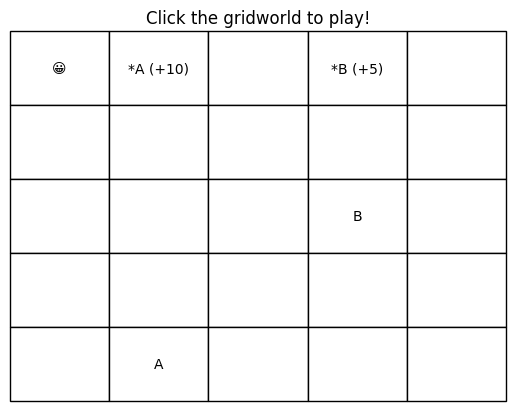

In [33]:
gw = GridWorld(5, 5)

gw.positionLabels[(4,1)] = 'A'
gw.positionLabels[(2,3)] = 'B'

gw.teleportations[(0,1)] = ((4,1), 10)
gw.teleportations[(0,3)] = ((2,3), 5)

gw.invalidActionReward = -1

## Interactive only with `%matplotlib tk`:
gw.play()

## Example 3.5: Evaluating the Random policy

Here, we evaluate the policy that takes a random action in each state.
First, we specify the numerical tolerance (`TOL`), the discount factor (`GAMMA`), and the probability of each action  under the uniform random policy.

In [34]:
# Tolerance used to evaluate policy
TOL = 1e-12

# Discount factor used
GAMMA = 0.9

# List of available actions
ACTIONS = [0, 1, 2, 3]

# Uniform probabilities for each action:
PROBS = [1/len(ACTIONS)] * len(ACTIONS)

Next, we perform policy evaluation, see expression (4.5), page 74, in Sutton & Barto.

In [35]:
# Initialize empty value function
values = np.zeros((gw.height, gw.width))

while True:
    # Initialize empty array for new values
    newValues = np.zeros((gw.height, gw.width))
    
    # Iterate over all states, compute new values
    for i in range(gw.height):
        for j in range(gw.width):
            # Compute new value (EXPECTED reward + discounted value after step)
            for action, prob in zip(ACTIONS, PROBS):
                (iNew, jNew), reward = gw.previewStep(action, (i, j))
                newValues[i, j] += prob * (reward + GAMMA * values[iNew, jNew])

    # Check tolerance, update values
    absChange = np.sum(np.abs(values - newValues))
    values = newValues
    if absChange < TOL:
        break

The resulting value function can be plotted using the `.drawWorld()` method.
In our implementation, we need to convert the array to a dictionary first.

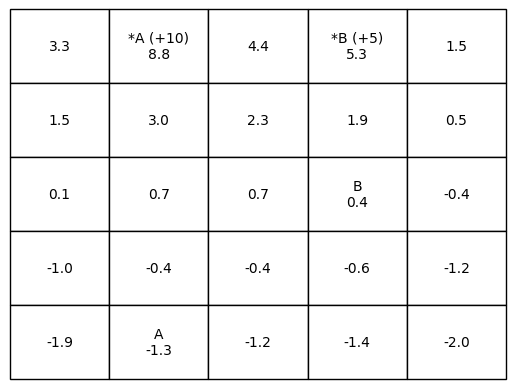

In [36]:
# Convert value array to dictionary
valueDict = dict()
for i in range(gw.height):
    for j in range(gw.width):
        valueDict[(i,j)] = values[i, j]

# shorter version:
valueDict = {(i,j): values[i,j] for i in range(gw.height) for j in range(gw.width)}

# Plot value funtion
gw.drawWorld(drawPos=False, values=valueDict)
plt.show()

## Example 3.8: Solving the Gridworld

Here, we perform value iteration to find the optimal policy and value function for the "AB-gridworld".
See also expression (4.10), page 83, in Sutton & Barto.

In [37]:
# Initialize empty value function
values = np.zeros((gw.height, gw.width))
policy = dict()

while True:
    # Initialize empty array for new values
    newValues = np.zeros((gw.height, gw.width))
    
    # Iterative over all rows/columns
    for i in range(gw.height):
        for j in range(gw.width):
            # Compute new values for each possible action
            # (reward + discounted value after step)
            actionValues = []
            for action in ACTIONS:
                (iNew, jNew), reward = gw.previewStep(action, (i, j))
                actionValues.append(reward + GAMMA * values[iNew, jNew])
            
            # Use value of best actions as new value (greedy policy)
            newValues[i,j] = max(actionValues)
            
            # Compute greedy policy
            # (this can also be done just once after the value iteration)
            greedyActions = []
            for action, actionValue in zip(ACTIONS, actionValues):
                # Add action to list if its value is maximal
                # `TOL` allows for small numerical imprecision
                if abs(actionValue - newValues[i,j]) <= TOL:
                    greedyActions.append(action)
            policy[(i,j)] = greedyActions

    # Check tolerance, update values
    absChange = np.sum(np.abs(values - newValues))
    values = newValues
    if absChange < TOL:
        break

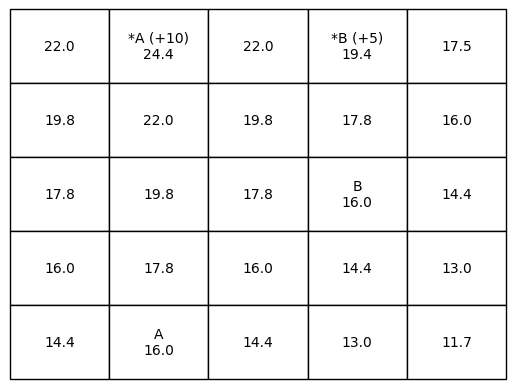

In [38]:
# Convert to dictionary
valueDict = {(i,j): values[i,j] for i in range(gw.height) for j in range(gw.width)}

# Plot value funtion
gw.drawWorld(drawPos=False, values=valueDict)
plt.show()

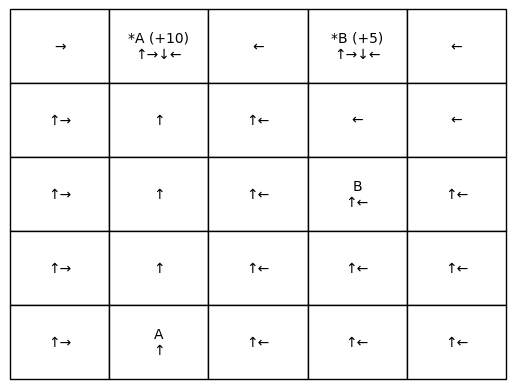

In [39]:
# Plot policy
gw.drawWorld(drawPos = False, policy=policy)
plt.show()

## Exercises

- Repeat the computations above using your own implementation of the `GridWorld` class
- Change the reward for the jump `*B->B`, e.g. to `6`, `8`, `9`. How does the greedy policy behave?